In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

In [2]:
def get_processed_image(image_path, trial, process_name):
    filename = os.path.basename(image_path)
    return cv2.imread(f"./output/trial_{trial}/processed_images/masks/{process_name}/{os.path.basename(image_path)}", cv2.IMREAD_GRAYSCALE)


def get_subdirectories(directory):
    return [f.path for f in os.scandir(directory) if f.is_dir()]

def get_process_names(directory):
    return [os.path.basename(f) for f in get_subdirectories(directory)]

def load_images_for_given_process(image_path, trial_number, process_name):
    """
        Load images from the given filenames. Returns raw image and the processed image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    p_image = cv2.imread(f"./output/trial_{trial_number}/processed_images/masks/{process_name}/{os.path.basename(image_path)}", cv2.IMREAD_GRAYSCALE)
    
    return image, p_image
 


def plot_images_for_process(process_name, trial_number):
    images = glob.glob(f"./output/trial_{trial_number}/processed_images/masks/{process_name}/*.png")
    for image_name in images:
        image, p_image = load_images_for_given_process(image_name, trial_number, process_name)
        print(f"Image: {image_name}")
        # display them both together
        plt.subplot(1, 2, 1)
        plt.axis('off')
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.imshow(p_image, cmap='gray')
        plt.suptitle(f"{os.path.basename(image_name)} - {process_name}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()


# Display the process names for easy reference

In [3]:
trial_number = 1
process_names = get_process_names(f"output/trial_{trial_number}/processed_images/masks")
images = glob.glob(f"output/trial_{trial_number}/rois/*.png")

for process_name in process_names:
    print(process_name)
    
print(f"len(images): {len(images)}")    


adaptive_gaussian_thresholding_blurred_equalized
adaptive_gaussian_thresholding_blurred_not_equalized
adaptive_gaussian_thresholding_not_blurred_equalized
adaptive_gaussian_thresholding_not_blurred_not_equalized
adaptive_thresholding_blurred_equalized
adaptive_thresholding_blurred_not_equalized
adaptive_thresholding_not_blurred_equalized
adaptive_thresholding_not_blurred_not_equalized
otsu_thresholding_blurred_equalized
otsu_thresholding_blurred_not_equalized
otsu_thresholding_not_blurred_equalized
otsu_thresholding_not_blurred_not_equalized
len(images): 9


# Display the 9 images and their processed versions for a given process_name

In [4]:
# plot_images_for_process(process_name, trial_number)


# Create contours and filter according to size

In [5]:
def get_filtered_contours(image, min_area=None, max_area=None):
    if min_area is None:
        min_area = 0
    
    if (max_area is None) or (max_area <= min_area):
        max_area = np.inf
        
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return [c for c in contours if min_area < cv2.contourArea(c) < max_area]

Processing image 1 of 9 :  output/trial_1/rois\strip_101.png
Processing image 2 of 9 :  output/trial_1/rois\strip_106.png
Processing image 3 of 9 :  output/trial_1/rois\strip_134.png
Processing image 4 of 9 :  output/trial_1/rois\strip_135.png
Processing image 5 of 9 :  output/trial_1/rois\strip_161.png
Processing image 6 of 9 :  output/trial_1/rois\strip_176.png
Processing image 7 of 9 :  output/trial_1/rois\strip_187.png
Processing image 8 of 9 :  output/trial_1/rois\strip_229.png
Processing image 9 of 9 :  output/trial_1/rois\strip_232.png


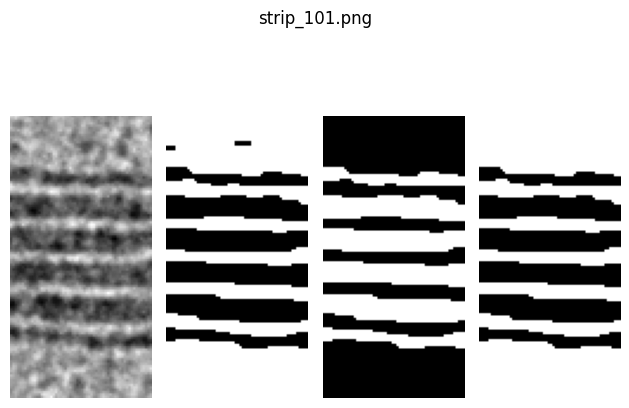

In [13]:
process_name = "otsu_thresholding_blurred_not_equalized"
images_dict = {}

os.makedirs(f"./output/trial_{trial_number}/processed_images/lumen", exist_ok=True)
os.makedirs(f"./output/trial_{trial_number}/processed_images/membrane", exist_ok=True)

for i, image_name in enumerate(images):
    image, p_image = load_images_for_given_process(image_name, trial_number, process_name)


    # get the lumen image
    p_image_inv = cv2.bitwise_not(p_image) # the p image has black for membrane. Contours is looking for the white area. So to 
    lumen_contours = get_filtered_contours(p_image_inv, min_area=80) # get the lumen contours, filter out small areas
    lumen_image = np.ones_like(p_image) # create a white image
    
    cv2.drawContours(lumen_image, lumen_contours, -1, (255, 255, 255), -1) # fill the lumen contours with black
    
    # get the membrane image, which is already black in the p_image. So invert the lumen image
    membrane_image = cv2.bitwise_not(lumen_image)

    # save the lumen_image and membrane_image to disk as binary images
    cv2.imwrite(f"./output/trial_{trial_number}/processed_images/lumen/{os.path.basename(image_name)}", lumen_image)
    cv2.imwrite(f"./output/trial_{trial_number}/processed_images/membrane/{os.path.basename(image_name)}", membrane_image)

    image_dict = {
        "image_name": image_name,
        "image": image,
        "p_image": p_image,
        "lumen": lumen_image,
        "membrane": membrane_image
    }
    
    # add it to images_dict
    print("Processing image", i+1, "of", len(images), ": ", image_name)
    images_dict[os.path.basename(image_name)] = image_dict
    
#display one of the images
image_name = list(images_dict.keys())[0]
image_dict = images_dict[image_name]
plt.subplot(1, 4, 1)
plt.axis('off')
plt.imshow(image_dict["image"], cmap='gray')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.imshow(image_dict["p_image"], cmap='gray')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.imshow(image_dict["lumen"], cmap='gray')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.imshow(image_dict["membrane"], cmap='gray')
plt.suptitle(image_name)
plt.tight_layout()
plt.show()



Image 1 of 9


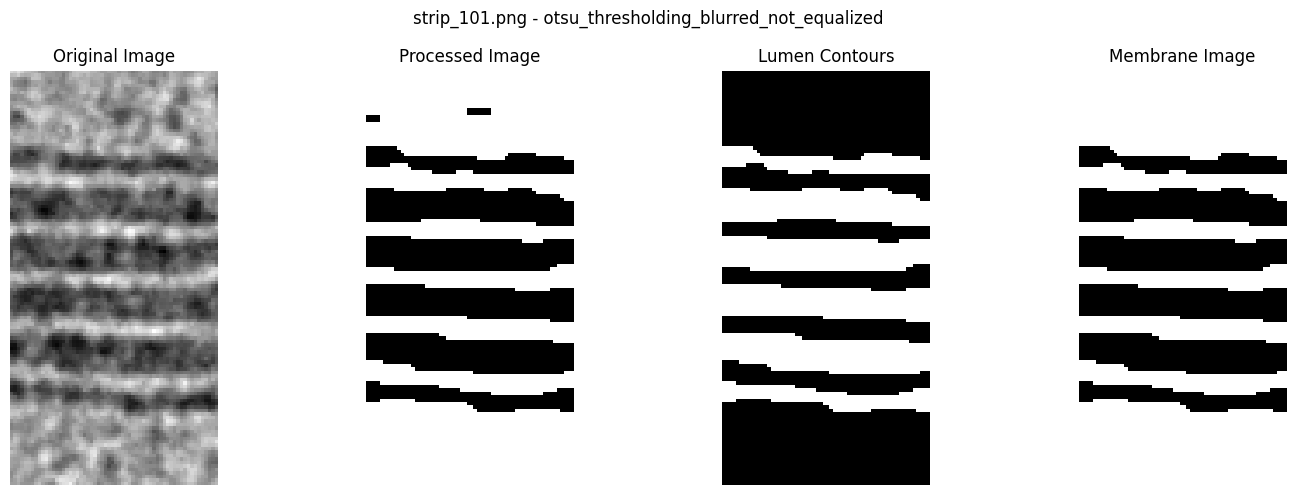

Image shape: (120, 60), Processed Image shape: (120, 60), Lumen Image shape: (120, 60), Membrane Image shape: (120, 60)
Lumen Pixels: 2738, Membrane Pixels: 0
Image 2 of 9


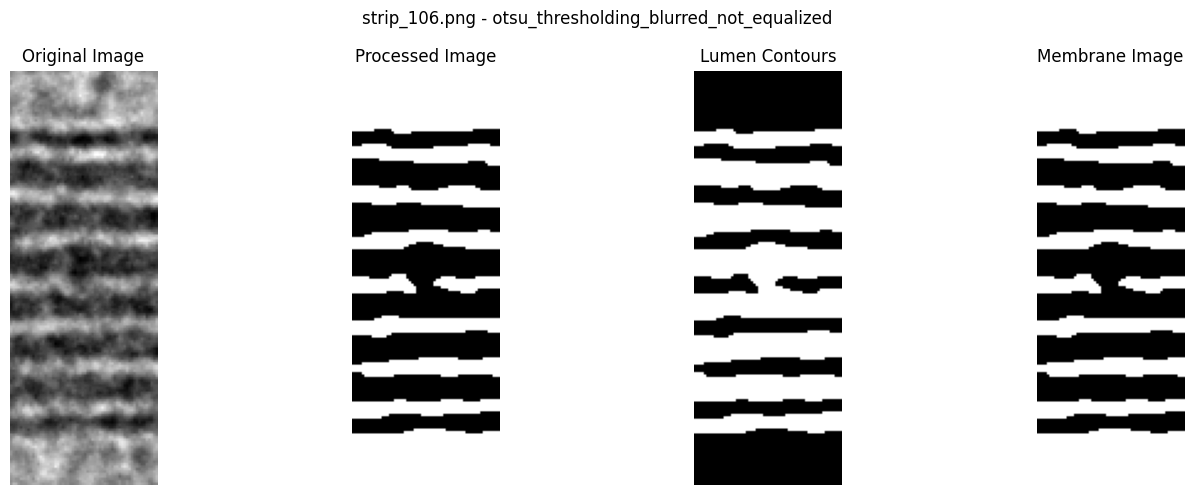

Image shape: (169, 60), Processed Image shape: (169, 60), Lumen Image shape: (169, 60), Membrane Image shape: (169, 60)
Lumen Pixels: 4751, Membrane Pixels: 0
Image 3 of 9


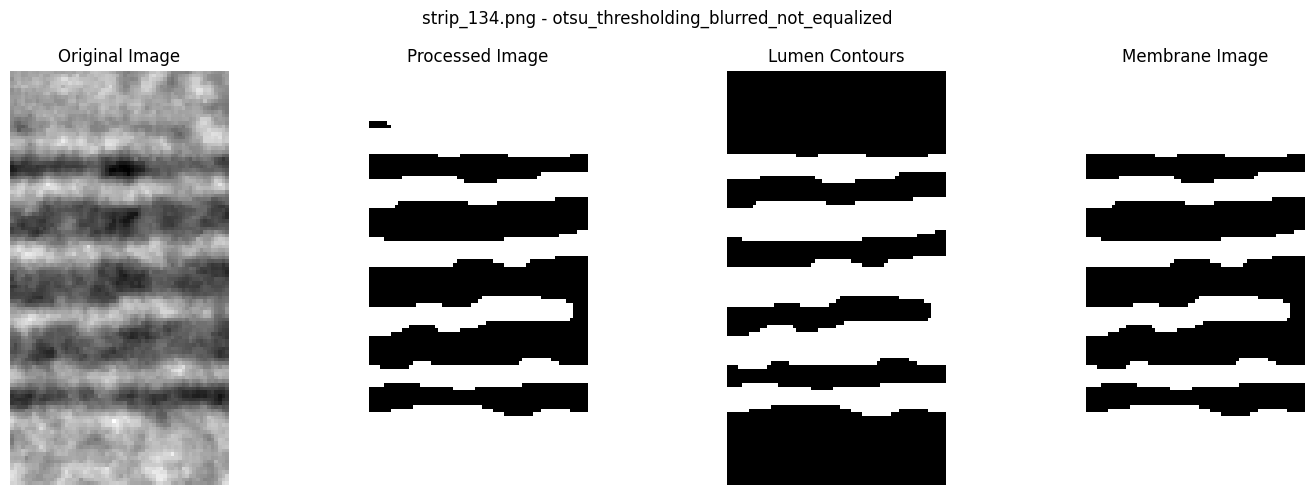

Image shape: (114, 60), Processed Image shape: (114, 60), Lumen Image shape: (114, 60), Membrane Image shape: (114, 60)
Lumen Pixels: 2663, Membrane Pixels: 0
Image 4 of 9


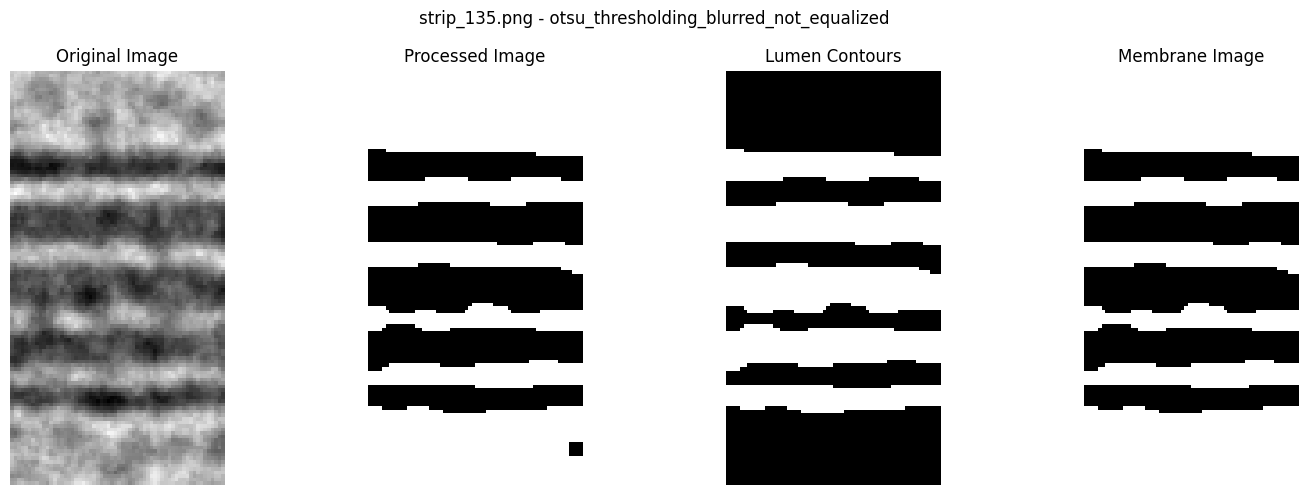

Image shape: (116, 60), Processed Image shape: (116, 60), Lumen Image shape: (116, 60), Membrane Image shape: (116, 60)
Lumen Pixels: 2809, Membrane Pixels: 0
Image 5 of 9


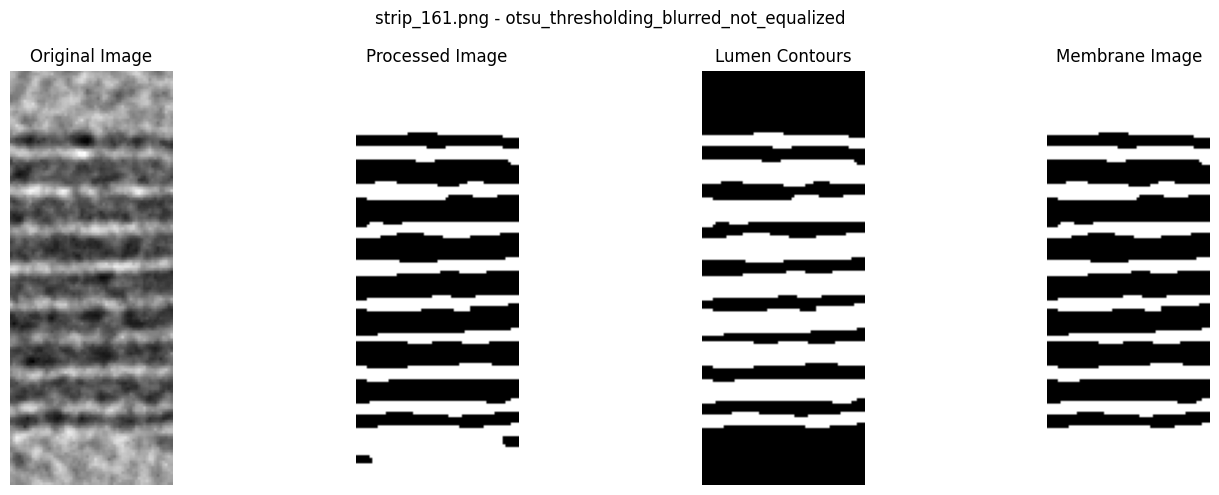

Image shape: (153, 60), Processed Image shape: (153, 60), Lumen Image shape: (153, 60), Membrane Image shape: (153, 60)
Lumen Pixels: 4188, Membrane Pixels: 0
Image 6 of 9


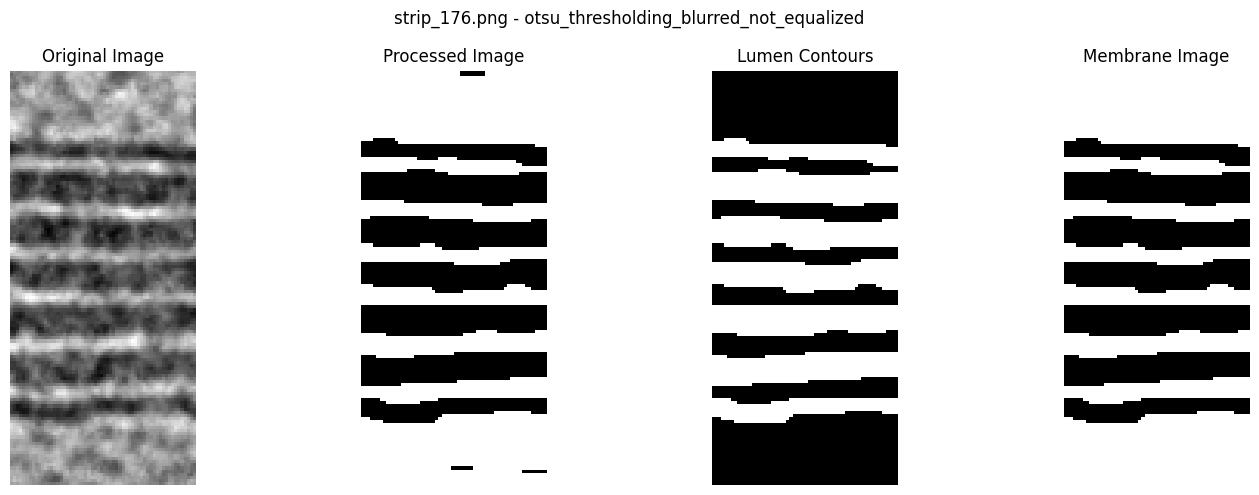

Image shape: (134, 60), Processed Image shape: (134, 60), Lumen Image shape: (134, 60), Membrane Image shape: (134, 60)
Lumen Pixels: 3345, Membrane Pixels: 0
Image 7 of 9


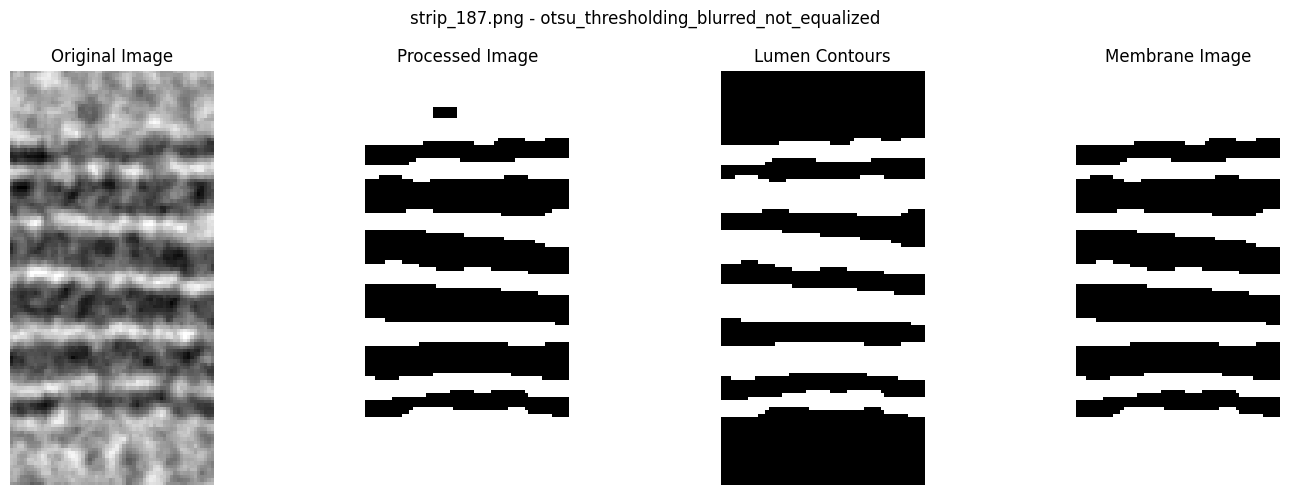

Image shape: (122, 60), Processed Image shape: (122, 60), Lumen Image shape: (122, 60), Membrane Image shape: (122, 60)
Lumen Pixels: 2976, Membrane Pixels: 0
Image 8 of 9


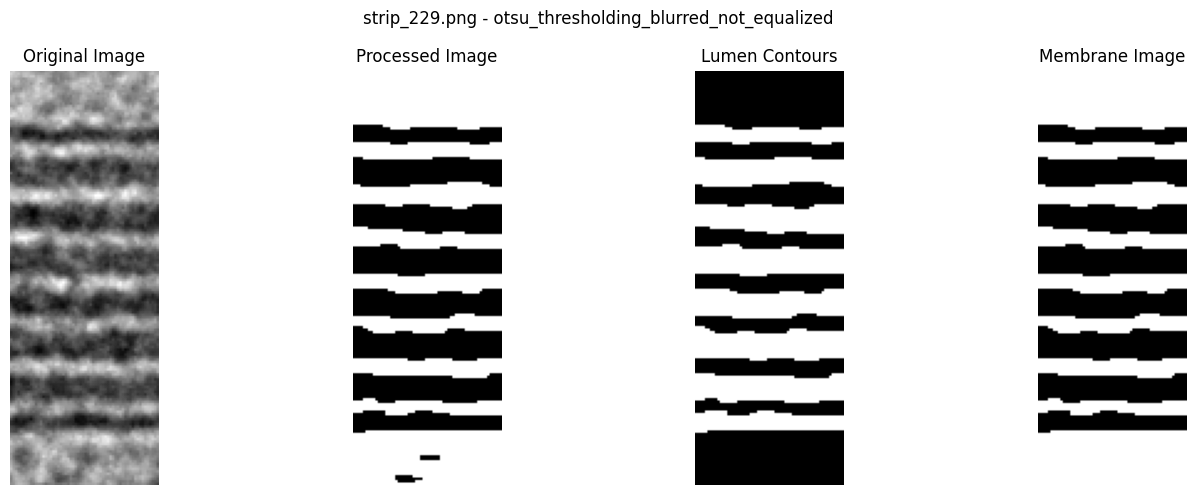

Image shape: (167, 60), Processed Image shape: (167, 60), Lumen Image shape: (167, 60), Membrane Image shape: (167, 60)
Lumen Pixels: 4582, Membrane Pixels: 0
Image 9 of 9


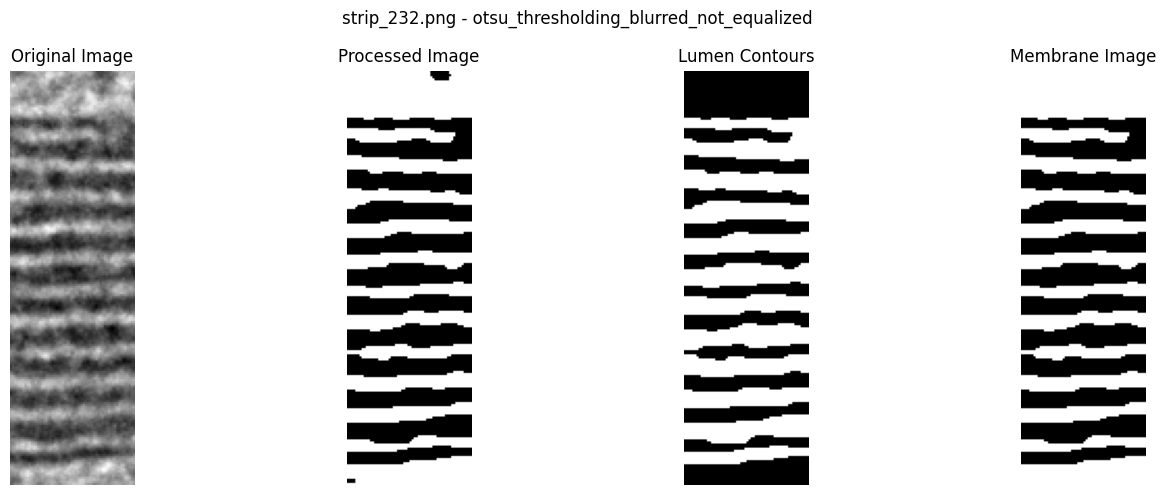

Image shape: (200, 60), Processed Image shape: (200, 60), Lumen Image shape: (200, 60), Membrane Image shape: (200, 60)
Lumen Pixels: 5951, Membrane Pixels: 0


In [14]:
# display the images

for i, image_dict in enumerate(images_dict):
    
    image_name, image, p_image, lumen_image, membrane_image = images_dict[os.path.basename(images[i])].values()

    print("Image", i+1, "of", len(images_dict))

    fig, ax = plt.subplots(1, 4, figsize=(15, 5))

    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    ax[1].imshow(p_image, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Processed Image')

    ax[2].imshow(lumen_image, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title('Lumen Contours')

    ax[3].imshow(membrane_image, cmap='gray')
    ax[3].axis('off')
    ax[3].set_title('Membrane Image')

    plt.suptitle(f"{os.path.basename(image_name)} - {process_name}")
    plt.tight_layout()
    plt.show()
        
    # printout the shapes of the various images
    print(f"Image shape: {image.shape}, Processed Image shape: {p_image.shape}, Lumen Image shape: {lumen_image.shape}, Membrane Image shape: {membrane_image.shape}")
    # print out the number of pixels of white in the lumen and membrane images
    print(f"Lumen Pixels: {np.sum(lumen_image == 255)}, Membrane Pixels: {np.sum(membrane_image == 255)}")

In [ ]:
#